<a href="https://colab.research.google.com/github/jeffheaton/present/blob/master/WUSTL/CABI-Demand/lab-4-prophet-solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Washington University [Olin School of Business](https://olin.wustl.edu/EN-US/Pages/default.aspx)
[Center for Analytics and Business Insights](https://olin.wustl.edu/EN-US/Faculty-Research/research-centers/center-analytics-business-insights/Pages/default.aspx) (CABI)  
[Deep Learning for Demand Forecasting](https://github.com/jeffheaton/present/tree/master/WUSTL/CABI-Demand)  
Copyright 2022 by [Jeff Heaton](https://www.youtube.com/c/HeatonResearch), Released under [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) 

# Lab 4: Meta Prophet

* Count people on beach and sidewalks separately.

Connect GDrive, to write out any results.

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Read the provided tabular data CSVs.

In [2]:
import pandas as pd
import os

df_sales = pd.read_csv("https://data.heatonresearch.com/wustl/CABI/demand-forecast/sales_train.csv")
df_items = pd.read_csv("https://data.heatonresearch.com/wustl/CABI/demand-forecast/items.csv")
df_resturant = pd.read_csv("https://data.heatonresearch.com/wustl/CABI/demand-forecast/resturants.csv")

df_sales.date = pd.to_datetime(df_sales.date, errors='coerce') 


Begin by producing a line graph of all sales over the provided 3-year timespan. We will use this to train Prophet.

In [9]:
import plotly.express as px

df2 = df_sales[df_sales.item_id==3]
df_plot = df2[['date','item_count']].groupby(['date']).sum().reset_index()
#fig = px.line(df_plot, x="date", y="item_count", title='Total Sales by Date')
#fig.show()

Construct prophet and put the previous data into the form expected by prophet.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuct3_6pl/5rlcq7qz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuct3_6pl/2tl56gyt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84792', 'data', 'file=/tmp/tmpuct3_6pl/5rlcq7qz.json', 'init=/tmp/tmpuct3_6pl/2tl56gyt.json', 'output', 'file=/tmp/tmpuct3_6pl/prophet_modelzfszo86t/prophet_model-20221021023837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:38:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:38:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


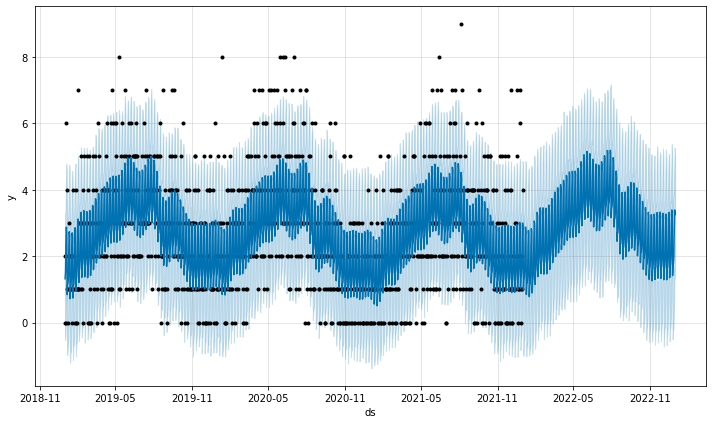

In [13]:
import pandas as pd
from prophet import Prophet

df_plot.columns = ['ds','y']

m = Prophet()
m.fit(df_plot)

future = m.make_future_dataframe(periods=365)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)

Plot the future predictions.

See what seasonality and trend were detected.

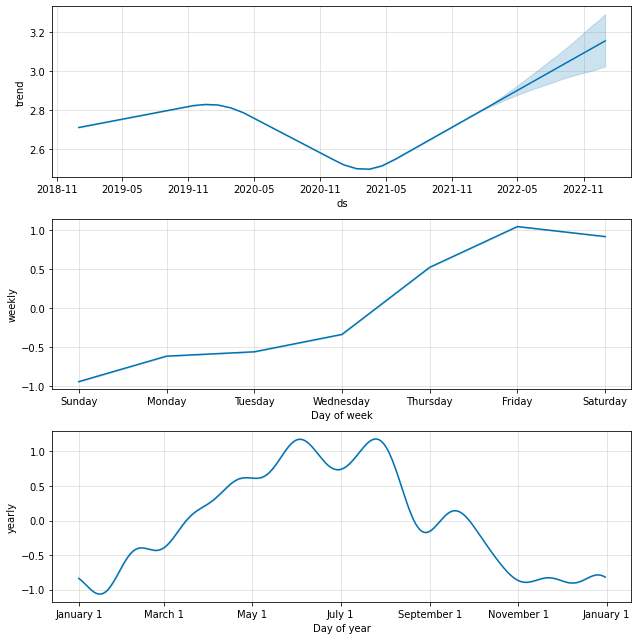

In [14]:
fig2 = m.plot_components(forecast)

Use Plotly to generate an interactive plot.

In [15]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)